In [36]:
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key1 = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'  # olist_customers_datase.csv
public_key2 = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'  # olist_orders_dataset.csv
public_key3 = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'  # olist_order_items_dataset.csv

# Получаем загрузочные ссылки
final_url1 = base_url + urlencode(dict(public_key=public_key1))
response1 = requests.get(final_url1)
download_url1 = response1.json()['href']

final_url2 = base_url + urlencode(dict(public_key=public_key2))
response2 = requests.get(final_url2)
download_url2 = response2.json()['href']

final_url3 = base_url + urlencode(dict(public_key=public_key3))
response3 = requests.get(final_url3)
download_url3 = response3.json()['href']


In [37]:
#download_url1='/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-kondrateva-32/project_data/olist_customers_dataset.csv'
#download_url2='/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-kondrateva-32/project_data/olist_orders_dataset.csv'
#download_url3='/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-kondrateva-32/project_data/olist_order_items_dataset.csv'

In [38]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Предобработка данных

   #### Таблица №1: customers
   olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

        customer_id — позаказный идентификатор пользователя

        customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

        customer_zip_code_prefix —  почтовый индекс пользователя

        customer_city —  город доставки пользователя

        customer_state —  штат доставки пользователя

#### Таблица №2: orders

olist_orders_dataset.csv —  таблица заказов

        order_id —  уникальный идентификатор заказа (номер чека)

        customer_id —  позаказный идентификатор пользователя

        order_status —  статус заказа

        order_purchase_timestamp —  время создания заказа

        order_approved_at —  время подтверждения оплаты заказа

        order_delivered_carrier_date —  время передачи заказа в логистическую службу

        order_delivered_customer_date —  время доставки заказа

        order_estimated_delivery_date —  обещанная дата доставки



*Уникальные статусы заказов в таблице olist_orders_dataset:*

        created —  создан

        approved —  подтверждён

        invoiced —  выставлен счёт

        processing —  в процессе сборки заказа

        shipped —  отгружен со склада

        delivered —  доставлен пользователю 

        unavailable —  недоступен

        canceled —  отменён

#### Таблица №3: order_items

olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

        order_id —  уникальный идентификатор заказа (номер чека)

        order_item_id —  идентификатор товара внутри одного заказа

        product_id —  ид товара (аналог штрихкода)

        seller_id — ид производителя товара

        shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

        price —  цена за единицу товара

        freight_value —  вес товара

In [39]:
# загружаем данные в таблицы
customers = pd.read_csv(download_url1)
orders = pd.read_csv(download_url2, parse_dates=['order_purchase_timestamp',
                                                 'order_approved_at', 
                                                 'order_delivered_carrier_date',
                                                 'order_delivered_customer_date',
                                                 'order_estimated_delivery_date'])
order_items = pd.read_csv(download_url3, parse_dates=['shipping_limit_date'])

In [40]:
# проверяем на наличиие дупликатов
print('Количество дупликатов в таблице customers:', len(customers)-len(customers.drop_duplicates()))
print('Количество дупликатов в таблице orders:',len(orders)-len(orders.drop_duplicates()))
print('Количество дупликатов в таблице order_items:',len(order_items)-len(order_items.drop_duplicates()))

Количество дупликатов в таблице customers: 0
Количество дупликатов в таблице orders: 0
Количество дупликатов в таблице order_items: 0


#### 1. Cмотрим количество строк, есть ли пропущенные значения, и типы данных в таблицах

In [41]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [42]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [43]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Вывод:
Есть пропущенные значения в таблице **orders** в колонках с временными данными **order_approved_at, order_delivered_carrier_date, order_delivered_customer_date**

     order_approved_at              99281     - подтвержденная оплата
     order_delivered_carrier_date   97658     - передано в логистику
     order_delivered_customer_date  96476     - доставлено покупателю - меньше всего данных
 
 работают по предоплате? 

#### 2. Oписательная характеристика для всех колонок таблиц

In [44]:
customers.describe(include='all')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     e10711e2c6acbe40d4fa6ad9a5bf647c  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

customer_id > customer_unique_id - что означает, что есть покупатели, которые создали заказ больше одного раза

In [45]:
orders.describe(include='all')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

/opt/tljh/user/lib/python3.7/site-packages/ipyker

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     9fa2b518229715cade50be6375126ebf  7b9c62c11a289126729179b8a781c2a2   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-03-31 15:08:21  2018-02-27 04:31:10   
freq          96478                        3                    9   
first           NaN      2016-09-04 21:15:19  2016-09-15 12:16:38   
last            NaN      2018-10-17 17:30:18  2018-09-03 17:40:06   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-14 20:02:44   
freq                             47                             3   
first           2016-10-08 10:34:01           2016-10-11 13:46:32   
last            2018-09-11 19:48:28           2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522  
first            2016-09-30 00:00:00  
last             2018-11-12 00:00:00

уникальных значений order_status как и должно быть 8 - значит все статусы написаны правильно
данные по заказам за период чуть больше двух лет

самое большое количество обозначения статуса в колонке order_status - delivered = 96478 ( при этом order_delivered_customer_date = 96476) - не проставленных дат получается 2 - стоит посмотреть на эти заказы внимательнее

последнее время создания заказа 2018-10-17 17:30:18 - данную дату + один день будем считать "сегодня"

In [46]:
order_items.describe(include='all')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
first                                NaN            NaN   
last                                 NaN            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  
count                112650  112650.000000  112650.000000  
unique                93318            NaN            NaN  
top     2018-03-01 02:50:48            NaN            NaN  
freq                     21            NaN            NaN  
first   2016-09-19 00:15:34            NaN            NaN  
last    2020-04-09 22:35:08            NaN            NaN  
mean                    NaN     120.653739      19.990320  
std                     NaN     183.633928      15.806405  
min                     NaN       0.850000       0.000000  
25%                     NaN      39.900000      13.080000  
50%                     NaN      74.990000      16.260000  
75%                     NaN     134.900000      21.150000  
max                     NaN    6735.000000     409.680000

из всех созданных заказов (99441 - из таблицы orders) в таблице orer_items всего уникальных заказов попало 98666

In [47]:
# посмотрим распределение данных orders по месяцам
# для этого выделим в отдельный столбец дату создания заказа
orders['year_month'] = orders.order_purchase_timestamp.dt.to_period('M')

# сгруппируем по созданному столбцу и узнаем количество заказов по месяцам
orders.groupby('year_month').agg({'order_id':'count'})

order_id
year_month          
2016-09            4
2016-10          324
2016-12            1
2017-01          800
2017-02         1780
2017-03         2682
2017-04         2404
2017-05         3700
2017-06         3245
2017-07         4026
2017-08         4331
2017-09         4285
2017-10         4631
2017-11         7544
2017-12         5673
2018-01         7269
2018-02         6728
2018-03         7211
2018-04         6939
2018-05         6873
2018-06         6167
2018-07         6292
2018-08         6512
2018-09           16
2018-10            4

Рассмотрев распределение данных по месяцам, получаем нестабильные данные за 2016 год, и мало данных за сентябрь и октябрь 2018 года ( может недогружены ) . Данные за эти месяцы удалим из таблицы для дальнейшего анализа.

In [48]:
orders = orders.query('year_month>"2016-12" and year_month<"2018-09"')

In [49]:
orders.year_month.sort_values().unique()

<PeriodArray>
['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
 '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
 '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08']
Length: 20, dtype: period[M]

#### 3. Определим понятие совершенной покупки

Для этого разберем таблицу orders, а именно колонку order_status и колонки с датами

In [50]:
# создадим дату "сегодня" 
now_date = orders.order_purchase_timestamp.max() + timedelta(days=1)
now_date

Timestamp('2018-09-01 16:13:44')

In [51]:
# сперва посмотрим на статусы
orders.groupby('order_status').agg({'order_id':'count'})

order_id
order_status          
approved             2
canceled           580
created              5
delivered        96211
invoiced           296
processing         299
shipped           1097
unavailable        602

In [52]:
# посмотрим на статусы у тех заказов, где проставлена дата доставки и где не проставлена дата доставки
print('Не проставлена дата доставки \n\n',orders.query('order_delivered_customer_date!=order_delivered_customer_date').groupby('order_status', as_index=False).agg({'order_id':'count'}))
print('\n Проставлена дата доставки \n\n',orders.query('order_delivered_customer_date==order_delivered_customer_date').groupby('order_status', as_index=False).agg({'order_id':'count'}))

Не проставлена дата доставки 

   order_status  order_id
0     approved         2
1     canceled       579
2      created         5
3    delivered         8
4     invoiced       296
5   processing       299
6      shipped      1097
7  unavailable       602

 Проставлена дата доставки 

   order_status  order_id
0     canceled         1
1    delivered     96203


* есть заказы, у которых есть дата доставки, но имеет статус canceled
* есть заказы, которые имеют статус доставлен, но не проставлена дата доставки

In [53]:
# посмотрим статусы заказов с датами подтвержденной оплаты
print('Не проставлена дата оплаты \n\n',orders.query('order_approved_at!=order_approved_at').groupby('order_status', as_index=False).agg({'order_id':'count'}))
print('\n Проставлена дата оплаты \n\n',orders.query('order_approved_at==order_approved_at').groupby('order_status', as_index=False).agg({'order_id':'count'}))

Не проставлена дата оплаты 

   order_status  order_id
0     canceled       116
1      created         5
2    delivered        14

 Проставлена дата оплаты 

   order_status  order_id
0     approved         2
1     canceled       464
2    delivered     96197
3     invoiced       296
4   processing       299
5      shipped      1097
6  unavailable       602


* есть заказы, которые не имеют времени оплаты, но имеют статус доставлен
* есть заказы, которые оплачены и имеют разные статусы

In [54]:
# проверяем есть ли заказы с подтвержденной оплатой позже времени доставки
orders.query('order_approved_at>order_delivered_customer_date')

order_id                       customer_id  \
199    58d4c4747ee059eeeb865b349b41f53a  1755fad7863475346bc6c3773fe055d3   
483    4df92d82d79c3b52c7138679fa9b07fc  ba0660bf3fffe505ee892e153a2fbd49   
1986   6e57e23ecac1ae881286657694444267  2dda54e25d0984e12705c84d4030e6e0   
3659   f222c56f035b47dfa1e069a88235d730  b74ca180d63f9ae0443e4e13a2f5bdaf   
11738  cf72398d0690f841271b695bbfda82d2  2b7fff075bda701552485ef3f0810257   
...                                 ...                               ...   
89703  fcbf4f4ef049367f9f85af94ed3b6010  814d433efda6ac4b0859b5a71aac64c8   
91801  4387477eec4b3c89b39f3f454940d059  dbbbdb6ab9a7d8e3fc39a907f456bf19   
93680  4f3a6e28d764cf896b1fceb0028422c8  e24fceba7ac4b1b1cd1884f05ba68e9d   
94359  9c3186381b733d4304e2e416afc6bbc1  a4bd2fc7bf4fc0061011ef71a2208d63   
98359  5a41aefdf8010bbd69a5264f69213b73  babb58dd58d643c769e12f18288b3214   

      order_status order_purchase_timestamp   order_approved_at  \
199      delivered      2018-07-21 12:49:32 2018-07-26 23:31:53   
483      delivered      2018-07-24 11:32:11 2018-07-29 23:30:52   
1986     delivered      2018-08-09 17:36:47 2018-08-20 15:55:42   
3659     delivered      2018-01-30 09:43:45 2018-02-04 23:31:47   
11738    delivered      2017-09-01 18:45:33 2017-09-13 22:04:39   
...            ...                      ...                 ...   
89703    delivered      2018-04-20 15:11:15 2018-04-24 18:41:20   
91801    delivered      2018-08-09 20:45:10 2018-08-20 15:56:29   
93680    delivered      2018-07-03 09:34:16 2018-07-05 16:21:50   
94359    delivered      2018-07-28 20:49:05 2018-08-02 23:30:29   
98359    delivered      2018-07-02 16:13:00 2018-07-05 16:17:20   

      order_delivered_carrier_date order_delivered_customer_date  \
199            2018-07-24 12:57:00           2018-07-25 23:58:19   
483            2018-07-26 14:46:00           2018-07-27 18:55:57   
1986           2018-08-14 13:26:00           2018-08-17 16:45:45   
3659           2018-01-31 19:48:44           2018-02-01 20:10:38   
11738          2017-09-04 20:12:41           2017-09-11 14:15:02   
...                            ...                           ...   
89703          2018-04-23 21:58:45           2018-04-24 14:03:28   
91801          2018-08-14 12:35:00           2018-08-15 14:56:43   
93680          2018-07-03 16:52:00           2018-07-05 13:32:49   
94359          2018-07-31 14:09:00           2018-08-01 19:04:37   
98359          2018-07-03 12:40:00           2018-07-05 12:48:37   

      order_estimated_delivery_date year_month  
199                      2018-07-31    2018-07  
483                      2018-08-06    2018-07  
1986                     2018-09-06    2018-08  
3659                     2018-02-15    2018-01  
11738                    2017-09-21    2017-09  
...                             ...        ...  
89703                    2018-04-30    2018-04  
91801                    2018-08-14    2018-08  
93680                    2018-07-20    2018-07  
94359                    2018-08-03    2018-07  
98359                    2018-07-16    2018-07  

[61 rows x 9 columns]

* 61 заказ оплачен после получения 

In [55]:
# посмотрим на заказы, у которых нет даты доставки, но статус заказа - delivered
delivered_without_date = orders.query('order_status=="delivered" and order_delivered_customer_date!=order_delivered_customer_date')
delivered_without_date

order_id                       customer_id  \
3002   2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f   
20618  f5dd62b788049ad9fc0526e3ad11a097  5e89028e024b381dc84a13a3570decb4   
43834  2ebdfc4f15f23b91474edf87475f108e  29f0540231702fda0cfdee0a310f11aa   
79263  e69f75a717d64fc5ecdfae42b2e8e086  cfda40ca8dd0a5d486a9635b611b398a   
82868  0d3268bad9b086af767785e3f0fc0133  4f1d63d35fb7c8999853b2699f5c7649   
92643  2d858f451373b04fb5c984a1cc2defaf  e08caf668d499a6d643dafd7c5cc498a   
97647  ab7c89dc1bf4a1ead9d6ec1ec8968a84  dd1b84a7286eb4524d52af4256c0ba24   
98038  20edc82cf5400ce95e1afacc25798b31  28c37425f1127d887d7337f284080a0f   

      order_status order_purchase_timestamp   order_approved_at  \
3002     delivered      2017-11-28 17:44:07 2017-11-28 17:56:40   
20618    delivered      2018-06-20 06:58:43 2018-06-20 07:19:05   
43834    delivered      2018-07-01 17:05:11 2018-07-01 17:15:12   
79263    delivered      2018-07-01 22:05:55 2018-07-01 22:15:14   
82868    delivered      2018-07-01 21:14:02 2018-07-01 21:29:54   
92643    delivered      2017-05-25 23:22:43 2017-05-25 23:30:16   
97647    delivered      2018-06-08 12:09:39 2018-06-08 12:36:39   
98038    delivered      2018-06-27 16:09:12 2018-06-27 16:29:30   

      order_delivered_carrier_date order_delivered_customer_date  \
3002           2017-11-30 18:12:23                           NaT   
20618          2018-06-25 08:05:00                           NaT   
43834          2018-07-03 13:57:00                           NaT   
79263          2018-07-03 13:57:00                           NaT   
82868          2018-07-03 09:28:00                           NaT   
92643                          NaT                           NaT   
97647          2018-06-12 14:10:00                           NaT   
98038          2018-07-03 19:26:00                           NaT   

      order_estimated_delivery_date year_month  
3002                     2017-12-18    2017-11  
20618                    2018-07-16    2018-06  
43834                    2018-07-30    2018-07  
79263                    2018-07-30    2018-07  
82868                    2018-07-24    2018-07  
92643                    2017-06-23    2017-05  
97647                    2018-06-26    2018-06  
98038                    2018-07-19    2018-06

* один заказ даже не имеет даты выгрузки в логистическую компанию

In [56]:
# теперь посмотрим на покупателей этих заказов в таблице customers 
customers[customers.customer_id.isin(delivered_without_date['customer_id'])]

customer_id                customer_unique_id  \
9034   5e89028e024b381dc84a13a3570decb4  2f17c5b324ad603491521b279a9ff4de   
12030  28c37425f1127d887d7337f284080a0f  175378436e2978be55b8f4316bce4811   
13357  29f0540231702fda0cfdee0a310f11aa  1bd06a0c0df8b23dacfd3725d2dc0bb9   
51668  ec05a6d8558c6455f0cbbd8a420ad34f  13467e882eb3a701826435ee4424f2bd   
85377  dd1b84a7286eb4524d52af4256c0ba24  cce5e8188bf42ffb3bb5b18ff58f5965   
87172  cfda40ca8dd0a5d486a9635b611b398a  3bc508d482a402715be4d5cf4020cc81   
89194  4f1d63d35fb7c8999853b2699f5c7649  ebf7e0d43a78c81991a4c59c145c75db   
97677  e08caf668d499a6d643dafd7c5cc498a  d77cf4be2654aa70ef150f8bfec076a6   

       customer_zip_code_prefix    customer_city customer_state  
9034                      18255           quadra             SP  
12030                      9431   ribeirao pires             SP  
13357                     12445  pindamonhangaba             SP  
51668                     18520        cerquilho             SP  
85377                      7261        guarulhos             SP  
87172                     13170           sumare             SP  
89194                     13560       sao carlos             SP  
97677                     91330     porto alegre             RS

* все покупатели разные

In [57]:
# и есть ли они в таблице order_items
order_items[order_items.order_id.isin(delivered_without_date['order_id'])]

order_id  order_item_id  \
5841    0d3268bad9b086af767785e3f0fc0133              1   
14472   20edc82cf5400ce95e1afacc25798b31              1   
19642   2d1e2d5bf4dc7227b3bfebb81328c15f              1   
19838   2d858f451373b04fb5c984a1cc2defaf              1   
20393   2ebdfc4f15f23b91474edf87475f108e              1   
75303   ab7c89dc1bf4a1ead9d6ec1ec8968a84              1   
101642  e69f75a717d64fc5ecdfae42b2e8e086              1   
108192  f5dd62b788049ad9fc0526e3ad11a097              1   

                              product_id                         seller_id  \
5841    ec165cd31c50585786ffda6feff5d0a6  8bdd8e3fd58bafa48af76b2c5fd71974   
14472   55bfa0307d7a46bed72c492259921231  343e716476e3748b069f980efbaa294e   
19642   a50acd33ba7a8da8e9db65094fa990a4  8581055ce74af1daba164fdbd55a40de   
19838   30b5b5635a79548a48d04162d971848f  f9bbdd976532d50b7816d285a22bd01e   
20393   e7d5464b94c9a5963f7c686fc80145ad  58f1a6197ed863543e0136bdedb3fce2   
75303   a2a7efc985315e86d4f0f705701b342b  ed4acab38528488b65a9a9c603ff024a   
101642  e7d5464b94c9a5963f7c686fc80145ad  58f1a6197ed863543e0136bdedb3fce2   
108192  2167c8f6252667c0eb9edd51520706a1  0bb738e4d789e63e2267697c42d35a2d   

       shipping_limit_date   price  freight_value  
5841   2018-07-05 21:29:54  188.99          15.63  
14472  2018-07-03 16:29:30   45.90           9.07  
19642  2017-12-04 17:56:40  117.30          17.53  
19838  2017-06-04 23:30:16  179.00          15.00  
20393  2018-07-05 17:15:12  139.00          19.07  
75303  2018-06-18 12:30:35  110.99           9.13  
101642 2018-07-05 22:15:14  139.00          19.07  
108192 2018-06-26 07:19:05  329.00          25.24

* все товары и продавцы разные
* все заказы присутствуют
* у каждого заказа одна позиция

In [58]:
# посмотрим на 14 заказов, которые без даты оплаты и со статусом - delivered
delivered_without_approvedat = orders.query('order_status=="delivered" and order_approved_at!=order_approved_at')
delivered_without_approvedat

order_id                       customer_id  \
5323   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771   
16567  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f   
19031  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3   
22663  5cf925b116421afa85ee25e99b4c34fb  29c35fc91fc13fb5073c8f30505d860d   
23156  12a95a3c06dbaec84bcfb0e2da5d228a  1e101e0daffaddce8159d25a8e53f2b2   
26800  c1d4211b3dae76144deccd6c74144a88  684cb238dc5b5d6366244e0e0776b450   
38290  d69e5d356402adc8cf17e08b5033acfb  68d081753ad4fe22fc4d410a9eb1ca01   
39334  d77031d6a3c8a52f019764e68f211c69  0bf35cac6cc7327065da879e2d90fae8   
48401  7002a78c79c519ac54022d4f8a65e6e8  d5de688c321096d15508faae67a27051   
61743  2eecb0d85f281280f79fa00f9cec1a95  a3d3c38e58b9d2dfb9207cab690b6310   
63052  51eb2eebd5d76a24625b31c33dd41449  07a2a7e0f63fd8cb757ed77d4245623c   
67697  88083e8f64d95b932164187484d90212  f67cd1a215aae2a1074638bbd35a223a   
72407  3c0b8706b065f9919d0505d3b3343881  d85919cb3c0529589c6fa617f5f43281   
84999  2babbb4b15e6d2dfe95e2de765c97bce  74bebaf46603f9340e3b50c6b086f992   

      order_status order_purchase_timestamp order_approved_at  \
5323     delivered      2017-02-18 14:40:00               NaT   
16567    delivered      2017-02-18 12:45:31               NaT   
19031    delivered      2017-02-18 13:29:47               NaT   
22663    delivered      2017-02-18 16:48:35               NaT   
23156    delivered      2017-02-17 13:05:55               NaT   
26800    delivered      2017-01-19 12:48:08               NaT   
38290    delivered      2017-02-19 01:28:47               NaT   
39334    delivered      2017-02-18 11:04:19               NaT   
48401    delivered      2017-01-19 22:26:59               NaT   
61743    delivered      2017-02-17 17:21:55               NaT   
63052    delivered      2017-02-18 15:52:27               NaT   
67697    delivered      2017-02-18 22:49:19               NaT   
72407    delivered      2017-02-17 15:53:27               NaT   
84999    delivered      2017-02-18 17:15:03               NaT   

      order_delivered_carrier_date order_delivered_customer_date  \
5323           2017-02-23 12:04:47           2017-03-01 13:25:33   
16567          2017-02-23 09:01:52           2017-03-02 10:05:06   
19031          2017-02-22 16:25:25           2017-03-01 08:07:38   
22663          2017-02-22 11:23:10           2017-03-09 07:28:47   
23156          2017-02-22 11:23:11           2017-03-02 11:09:19   
26800          2017-01-25 14:56:50           2017-01-30 18:16:01   
38290          2017-02-23 03:11:48           2017-03-02 03:41:58   
39334          2017-02-23 07:23:36           2017-03-02 16:15:23   
48401          2017-01-27 11:08:05           2017-02-06 14:22:19   
61743          2017-02-22 11:42:51           2017-03-03 12:16:03   
63052          2017-02-23 03:09:14           2017-03-07 13:57:47   
67697          2017-02-22 11:31:06           2017-03-02 12:06:06   
72407          2017-02-22 11:31:30           2017-03-03 11:47:47   
84999          2017-02-22 11:23:11           2017-03-03 18:43:43   

      order_estimated_delivery_date year_month  
5323                     2017-03-17    2017-02  
16567                    2017-03-21    2017-02  
19031                    2017-03-17    2017-02  
22663                    2017-03-31    2017-02  
23156                    2017-03-20    2017-02  
26800                    2017-03-01    2017-01  
38290                    2017-03-27    2017-02  
39334                    2017-03-22    2017-02  
48401                    2017-03-16    2017-01  
61743                    2017-03-20    2017-02  
63052                    2017-03-29    2017-02  
67697                    2017-03-21    2017-02  
72407                    2017-03-23    2017-02  
84999                    2017-03-31    2017-02

* если смотреть на даты заказов, то они были созданы более года назад от now_date(2018-09-01)
* ошибка может заключаться, что не проставлен статус отказа, или в том,что не проставлена дата оплаты - так как таких заказов не очень много можно их удалить

### Вывод о том, что считается покупкой:
Совершенной покупкой будем считать заказы, со статусом delivered и проставленной датой доставки и датой подтверждения оплаты

Заказы со статусом delivered, но без даты доставки или даты подтверждения оплаты  - удаляем как данные с ошибкой ( таких строк всего 14+8 = 22)

In [59]:
# создаем таблицу без ошибочных данных
orders_new = orders[(~orders.order_id.isin(delivered_without_approvedat['order_id']))&(~orders.order_id.isin(delivered_without_date['order_id']))]
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99070 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99070 non-null  object        
 1   customer_id                    99070 non-null  object        
 2   order_status                   99070 non-null  object        
 3   order_purchase_timestamp       99070 non-null  datetime64[ns]
 4   order_approved_at              98949 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97355 non-null  datetime64[ns]
 6   order_delivered_customer_date  96190 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99070 non-null  datetime64[ns]
 8   year_month                     99070 non-null  period[M]     
dtypes: datetime64[ns](5), object(3), period[M](1)
memory usage: 7.6+ MB


# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

Совершенная покупка - это покупка, которая была доставлена ( order_status == delivered ) из таблицы orders_new

In [60]:
# из orders_new  выбираем только те заказы, которые доставлены, добавляем customer_unique_id из таблицы customers

delivered_orders = orders_new.query('order_status=="delivered"').merge(customers[['customer_id','customer_unique_id']], on='customer_id', how='left')

In [61]:
delivered_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date year_month                customer_unique_id  
0                    2017-10-18    2017-10  7c396fd4830fd04220f754e42b4e5bff  
1                    2018-08-13    2018-07  af07308b275d755c9edb36a90c618231  
2                    2018-09-04    2018-08  3a653a41f6f9fc3d2a113cf8398680e8  
3                    2017-12-15    2017-11  7c142cf63193a1473d2e66489a9ae977  
4                    2018-02-26    2018-02  72632f0f9dd73dfee390c9b22eb56dd6

In [62]:
# группируем по столбцу customer_unique_id, считаем количество сделанных заказов этим пользователем
# переименовываем столбец order_id на orders_count 
customer_count_orders = delivered_orders.groupby('customer_unique_id', as_index=False)\
                                        .agg({'order_id':'count'})\
                                        .rename(columns = {'order_id':'orders_count'})
customer_count_orders.head()

customer_unique_id  orders_count
0  0000366f3b9a7992bf8c76cfdf3221e2             1
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1
2  0000f46a3911fa3c0805444483337064             1
3  0000f6ccb0745a6a4b88665a16c9f078             1
4  0004aac84e0df4da2b147fca70cf8255             1

In [63]:
# подсчитываем количество пользователей, у которых количество заказов 1
customer_count_orders.query('orders_count==1').count()

customer_unique_id    90295
orders_count          90295
dtype: int64

# ответ 1. Пользователи, которые совершили покупку 1 раз - 90295

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)


Сперва определим, что значит "не доставляются" и что считать "заказы в месяц" и причины будем определять по статусу заказа

* считать ли недоставленным заказ если он доставлен после обещанной даты доставки
* "месяцом" заказа считать месяц создания заказа или месяц обещанной доставки



In [64]:
# проверяем есть ли заказы доставленные после обещанной даты доставки
orders_new.query('order_status=="delivered" and order_delivered_customer_date>order_estimated_delivery_date')

order_id                       customer_id  \
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
35     8563039e855156e48fccee4d611a3196  5f16605299d698660e0606f7eae2d2f9   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
57     66e4624ae69e7dc89bd50222b59f581f  684fa6da5134b9e4dab731e00011712d   
...                                 ...                               ...   
99396  b3112ca67f3afd4e20cf2ee91fc4f804  6f83c71b6c044fb156d697d4130fe9b5   
99397  0fa1fab1d7c1211c824596ed5e111e3c  7f3bd6c94d2daf7b6462d1a894a775b4   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
99425  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
99432  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

      order_status order_purchase_timestamp   order_approved_at  \
20       delivered      2017-09-18 14:31:30 2017-09-19 04:04:09   
25       delivered      2018-02-20 23:46:53 2018-02-22 02:30:46   
35       delivered      2018-02-17 15:59:46 2018-02-17 16:15:34   
41       delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
57       delivered      2018-03-09 14:50:15 2018-03-09 15:40:39   
...            ...                      ...                 ...   
99396    delivered      2018-08-02 22:46:54 2018-08-02 23:04:06   
99397    delivered      2018-03-13 21:48:57 2018-03-13 22:40:28   
99423    delivered      2017-10-12 20:54:11 2017-10-14 03:28:24   
99425    delivered      2018-03-21 19:47:18 2018-03-21 20:05:26   
99432    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   

      order_delivered_carrier_date order_delivered_customer_date  \
20             2017-10-06 17:50:03           2017-10-09 22:23:46   
25             2018-02-26 22:25:22           2018-03-21 22:03:54   
35             2018-02-20 23:03:56           2018-03-20 00:59:25   
41             2017-12-13 21:14:05           2017-12-28 18:59:23   
57             2018-03-15 00:31:19           2018-04-03 13:28:46   
...                            ...                           ...   
99396          2018-08-15 17:42:00           2018-08-21 00:03:26   
99397          2018-03-14 19:27:23           2018-04-05 19:59:49   
99423          2017-10-17 17:04:42           2017-11-21 17:06:59   
99425          2018-03-22 21:11:58           2018-04-11 00:48:31   
99432          2017-12-20 20:25:25           2018-01-26 15:45:14   

      order_estimated_delivery_date year_month  
20                       2017-09-28    2017-09  
25                       2018-03-12    2018-02  
35                       2018-03-20    2018-02  
41                       2017-12-21    2017-11  
57                       2018-04-02    2018-03  
...                             ...        ...  
99396                    2018-08-16    2018-08  
99397                    2018-04-02    2018-03  
99423                    2017-10-31    2017-10  
99425                    2018-04-09    2018-03  
99432                    2018-01-18    2017-12  

[7822 rows x 9 columns]

* большинство заказов (7822), доставляются покупателю позже срока, обещанной доставки - возможно покупатель позже забирают
* так как таких заказов очень много, будем считать все заказы с отметкой delivered - доставленными
* "месяц" недоставленных заказов будем считать месяц создания заказа 

In [65]:
# создаем таблицу недоставленных заказов сгруппированных по месяцам и статусу заказа
not_delivered = orders_new.query('order_status!="delivered"').groupby(["year_month",'order_status'], as_index=False).agg({'order_id':'count'})\
                      .rename(columns = {'order_id':'not_delivered_order'})

# для построения графика в plotly меняем тит данных колонки year_month
not_delivered.year_month = not_delivered.year_month.astype(str)
not_delivered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year_month           103 non-null    object
 1   order_status         103 non-null    object
 2   not_delivered_order  103 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [66]:
# строим график распределения недоставленных заказов по месяцам и детализированную по причинам
import plotly.express as px

fig = px.bar(not_delivered, x="year_month", y="not_delivered_order", color="order_status")
fig.show()

In [67]:
# расчет сколько в среднем не доставляется заказов в месяц
print('В среднем в месяц не доставляеются', round(not_delivered.groupby('year_month').sum().mean()[0]), 'заказа')
print('Всего за весь рассматриваемый период не доставлено', not_delivered.not_delivered_order.sum())


В среднем в месяц не доставляеются 144 заказа
Всего за весь рассматриваемый период не доставлено 2881


In [68]:
# общее количество недоставленных заказов по статусам
not_delivered.groupby('order_status').agg({'not_delivered_order':'sum'})

not_delivered_order
order_status                     
approved                        2
canceled                      580
created                         5
invoiced                      296
processing                    299
shipped                      1097
unavailable                   602

## Ответ №2 : В среднем за период 2017-01 :2018-08 в месяц не доставляется 144 заказа 

Из 2881 недоставленного заказа **1097** находятся в состояние shipped ( может покупатель сам не забрал или службы доставки потеряли?)

Отменил(canceled 580) или не оплатил (invoiced 296) или не дооформил(created 5) сам покупатель всего **881** заказ

И в процессе сборки(processing 299)+недоступен товар(unavailable 602)=**901** заказ подвисли со стороны продавцов


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

Рассматриваем только те товары, которые входят в заказы со статусом delivered

In [69]:
# заказы со статусом delivered
buy_orders = orders_new.query('order_status=="delivered"')

In [70]:
# создаем таблицу c идентификатором заказа (order_id),
#                   идентификатором товара (product_id),
#                   временем заказа (order_purchase_timestamp)

items_weekday = order_items[['order_id', 'product_id']].merge(buy_orders[['order_id','order_purchase_timestamp']], on='order_id',how='right')

In [71]:
# добавляем колонку day с именем дня недели
items_weekday['day'] = items_weekday.order_purchase_timestamp.dt.day_name()

In [72]:
# группируем по ид товара и дню недели.
# узнаем какое количество заказов(count_order) для каждого товара(product_id) сделано в какой день недели(day)
items_weekday = items_weekday.groupby(['product_id','day'],as_index=False).count().rename(columns={'order_id':'count_order'})[['product_id','day','count_order']]

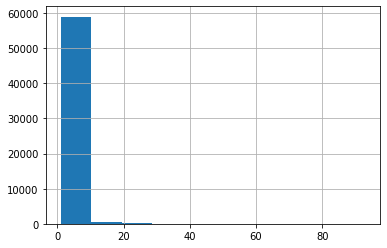

In [73]:
# строим распределение значений count_order
items_weekday['count_order'].hist()

In [74]:
# узнаем максимальное count_order для каждого заказа
items_max = items_weekday.groupby('product_id',as_index=False).agg({'count_order':'max'}).rename(columns={'count_order':'max_count'})


In [75]:
# добавляем столбец с максимальным числом заказов
items_weekday = items_weekday.merge(items_max,on='product_id',how='left')
items_weekday

product_id        day  count_order  max_count
0      00066f42aeeb9f3007548bb9d3f33c38     Sunday            1          1
1      00088930e925c41fd95ebfe695fd2655    Tuesday            1          1
2      0009406fd7479715e4bef61dd91f2462   Thursday            1          1
3      000b8f95fcb9e0096488278317764d19     Friday            1          1
4      000b8f95fcb9e0096488278317764d19  Wednesday            1          1
...                                 ...        ...          ...        ...
59722  fffdb2d0ec8d6a61f0a0a0db3f25b441     Friday            1          2
59723  fffdb2d0ec8d6a61f0a0a0db3f25b441     Sunday            1          2
59724  fffdb2d0ec8d6a61f0a0a0db3f25b441   Thursday            1          2
59725  fffdb2d0ec8d6a61f0a0a0db3f25b441    Tuesday            2          2
59726  fffe9eeff12fcbd74a2f2b007dde0c58  Wednesday            1          1

[59727 rows x 4 columns]

In [76]:
# получаем для каждого продукта дни недели, когда максимальное число заказов совпадало с количеством заказа в этот день недели
max_items_weekday = items_weekday.query('count_order==max_count')\
                                 .groupby('product_id')\
                                 .apply(lambda x: ','.join(x['day']))\
                                 .to_frame()\
                                 .reset_index().rename(columns={0:'max_weekday'})\
                                 .merge(items_max[['product_id','max_count']],on='product_id',how='left')



## ответ №3:

In [77]:
# получаем таблицу с колонками 
#       product_id - идентификатор товара,
#       max_weekday  - день недели, когда каждый товар покупается чаще всего 
#                      или список дней недели, если товар покупается одинаково много в эти дни
#       max_count - максимальное количество заказов для этого товара

max_items_weekday.sort_values(by='max_count',ascending=False)

product_id         max_weekday  max_count
8397   422879e10f46682990de24d770e7f83d           Wednesday         93
19209  99a4788cb24856965c36a24e339b6058              Monday         91
21526  aca2eb7d00ea1a7b8ebd4e68314663af            Thursday         89
10572  53b36df67ebb7c41585e8d54d6772e08             Tuesday         76
6901   368c6c730842d78016ad823897a372db              Friday         67
...                                 ...                 ...        ...
12413  629beb8e7317703dcc5f35b5463fd20e  Saturday,Wednesday          1
12410  62962adb9db1eeb96d0dd8fd2eb87875            Thursday          1
12409  629576b997e202bfb375fc3538a1c838    Thursday,Tuesday          1
12407  629506c6fad04664b0daf2a5105d6748              Monday          1
32075  fffe9eeff12fcbd74a2f2b007dde0c58           Wednesday          1

[32076 rows x 3 columns]

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

Воспользуемся ранее созданной таблицей **delivered_orders** - таблица только с доставленными (совершеными покупками) заказами и уникальным идентификатором покупателя

In [78]:
# группируем по индентификатору покупателя, месяцу заказа и аггрегируем по количеству заказов
customer_month_orders = delivered_orders.groupby(['customer_unique_id','year_month'],as_index=False).agg({'order_id':'count'})

In [79]:
# добавляем количество недель в каждом месяце
from calendar import monthrange
customer_month_orders['weeks'] = round(customer_month_orders['year_month'].apply(lambda x: monthrange(x.year,x.month)[1])/7,2)

In [80]:
# подсчитываем среднее количество покупок в неделю по месяцам
customer_month_orders['week_mean_month'] = round(customer_month_orders['order_id']/customer_month_orders['weeks'],2)

In [81]:
# создаем сводную таблицу среднее количество покупок в неделю для каждого покупателя по месяцам
week_mean_month_customer = pd.pivot_table(customer_month_orders, index='customer_unique_id', columns='year_month', values='week_mean_month')

In [82]:
week_mean_month_customer[week_mean_month_customer[week_mean_month_customer>=1].any(axis=1)]

year_month                        2017-01  2017-02  2017-03  2017-04  2017-05  \
customer_unique_id                                                              
12f5d6e1cbf93dafd9dcc19095df0b3d     1.35      NaN      NaN      NaN      NaN   
3e43e6105506432c953e165fb2acf44c      NaN      NaN      NaN      NaN      NaN   
a239b8e2fbce33780f1f1912e2ee5275      NaN      1.0      NaN      NaN      NaN   
b4e4f24de1e8725b74e4a1f4975116ed      NaN      NaN      NaN      NaN      NaN   

year_month                        2017-06  2017-07  2017-08  2017-09  2017-10  \
customer_unique_id                                                              
12f5d6e1cbf93dafd9dcc19095df0b3d      NaN      NaN      NaN      NaN      NaN   
3e43e6105506432c953e165fb2acf44c      NaN      NaN      NaN     0.23      NaN   
a239b8e2fbce33780f1f1912e2ee5275      NaN      NaN      NaN      NaN      NaN   
b4e4f24de1e8725b74e4a1f4975116ed      NaN      NaN      NaN      NaN      NaN   

year_month                        2017-11  2017-12  2018-01  2018-02  2018-03  \
customer_unique_id                                                              
12f5d6e1cbf93dafd9dcc19095df0b3d      NaN      NaN      NaN      NaN      NaN   
3e43e6105506432c953e165fb2acf44c      NaN     0.68     0.23      1.0      NaN   
a239b8e2fbce33780f1f1912e2ee5275      NaN      NaN      NaN      NaN      NaN   
b4e4f24de1e8725b74e4a1f4975116ed      NaN      NaN      NaN      1.0     0.23   

year_month                        2018-04  2018-05  2018-06  2018-07  2018-08  
customer_unique_id                                                             
12f5d6e1cbf93dafd9dcc19095df0b3d      NaN      NaN      NaN      NaN      NaN  
3e43e6105506432c953e165fb2acf44c      NaN      NaN      NaN      NaN      NaN  
a239b8e2fbce33780f1f1912e2ee5275      NaN      NaN      NaN      NaN      NaN  
b4e4f24de1e8725b74e4a1f4975116ed      NaN      NaN      NaN      NaN      NaN

### Ответ 4 Получена таблица, где подсчитана среднее количество покупок в неделю у каждого покупателя по месяцам


In [83]:

week_mean_month_customer.head()

year_month                        2017-01  2017-02  2017-03  2017-04  2017-05  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2      NaN      NaN      NaN      NaN      NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f      NaN      NaN      NaN      NaN      NaN   
0000f46a3911fa3c0805444483337064      NaN      NaN     0.23      NaN      NaN   
0000f6ccb0745a6a4b88665a16c9f078      NaN      NaN      NaN      NaN      NaN   
0004aac84e0df4da2b147fca70cf8255      NaN      NaN      NaN      NaN      NaN   

year_month                        2017-06  2017-07  2017-08  2017-09  2017-10  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2      NaN      NaN      NaN      NaN      NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f      NaN      NaN      NaN      NaN      NaN   
0000f46a3911fa3c0805444483337064      NaN      NaN      NaN      NaN      NaN   
0000f6ccb0745a6a4b88665a16c9f078      NaN      NaN      NaN      NaN     0.23   
0004aac84e0df4da2b147fca70cf8255      NaN      NaN      NaN      NaN      NaN   

year_month                        2017-11  2017-12  2018-01  2018-02  2018-03  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2      NaN      NaN      NaN      NaN      NaN   
0000b849f77a49e4a4ce2b2a4ca5be3f      NaN      NaN      NaN      NaN      NaN   
0000f46a3911fa3c0805444483337064      NaN      NaN      NaN      NaN      NaN   
0000f6ccb0745a6a4b88665a16c9f078      NaN      NaN      NaN      NaN      NaN   
0004aac84e0df4da2b147fca70cf8255     0.23      NaN      NaN      NaN      NaN   

year_month                        2018-04  2018-05  2018-06  2018-07  2018-08  
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      NaN     0.23      NaN      NaN      NaN  
0000b849f77a49e4a4ce2b2a4ca5be3f      NaN     0.23      NaN      NaN      NaN  
0000f46a3911fa3c0805444483337064      NaN      NaN      NaN      NaN      NaN  
0000f6ccb0745a6a4b88665a16c9f078      NaN      NaN      NaN      NaN      NaN  
0004aac84e0df4da2b147fca70cf8255      NaN      NaN      NaN      NaN      NaN

# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)


Перед проведением когортного анализа определяют четыре параметра:

    Признак формирования когорты — действие, которое объединяет людей в группу: первый визит, покупка, установка, регистрация и т.п.
    Размер когорты — временной интервал: день, неделя, месяц.
    Отчетный период — время исследования поведения групп.
    Анализируемый ключевой показатель: ROI, Retention Rate, LTV и т.д.

**Для нашего анализа:**

    Признак - месяц первой покупки

    Размер когорты - с января по декабрь 2017 года **year_month** из таблицы orders_new

    Отчетный период -  3 месяц после первой покупки

    Ключевой показатель - retention 

In [115]:
# скомпануем таблицу с колонками :  customer_unique_id, order_id, year_month
cohorts = delivered_orders[['customer_unique_id','order_id','year_month']]

In [116]:
# добавим столбец с месяцем первой покупки
cohorts = cohorts.merge(cohorts.groupby('customer_unique_id').year_month.min(), 
             on='customer_unique_id', 
             how='left', 
             suffixes=('', '_first'))

cohorts

customer_unique_id                          order_id  \
0      7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1      af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
2      3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
3      7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
4      72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   
...                                 ...                               ...   
96184  6359f309b166b0196dbf7ad2ac62bb5a  9c5dedf39a927c1b2549525ed64a053c   
96185  da62f9e57a76d978d02ab5362c509660  63943bddc261676b46f01ca7ac2f7bd8   
96186  737520a9aad80b3fbbdad19b66b37b30  83c1379a015df1e13d02aae0204711ab   
96187  5097a5312c8b157bb7be58ae360ef43c  11c177c8e97725db2631073c19f07b62   
96188  60350aa974b26ff12caad89e55993bd6  66dea50a8b16d9b4dee7af250b4be1a5   

      year_month year_month_first  
0        2017-10          2017-09  
1        2018-07          2018-07  
2        2018-08          2018-08  
3        2017-11          2017-11  
4        2018-02          2018-02  
...          ...              ...  
96184    2017-03          2017-03  
96185    2018-02          2018-02  
96186    2017-08          2017-08  
96187    2018-01          2018-01  
96188    2018-03          2018-03  

[96189 rows x 4 columns]

In [117]:
# объединим покупателей по месяцу первой покупки
cohorts = cohorts.groupby(['year_month_first','year_month']).agg({'order_id':'count','customer_unique_id':'count'})\
       .rename(columns={'order_id':'count_orders','customer_unique_id':'count_customers'})\


In [119]:
cohorts

count_orders  count_customers
year_month_first year_month                               
2017-01          2017-01              748              748
                 2017-02                2                2
                 2017-03                2                2
                 2017-04                1                1
                 2017-05                3                3
...                                   ...              ...
2018-06          2018-07               25               25
                 2018-08               16               16
2018-07          2018-07             6004             6004
                 2018-08               31               31
2018-08          2018-08             6180             6180

[207 rows x 2 columns]

In [120]:
# создадим ряд содержаший размер каждой когорты year_month_first
cohort_group_size = cohorts['count_customers'].groupby(level=0).first()
cohort_group_size.head()


year_month_first
2017-01     748
2017-02    1639
2017-03    2541
2017-04    2285
2017-05    3516
Freq: M, Name: count_customers, dtype: int64

In [121]:
# вычисляем значение коэффициента удержания Retention
customer_retention = cohorts['count_customers'].unstack('year_month').divide(cohort_group_size,axis=0)

In [122]:
customer_retention

year_month        2017-01   2017-02   2017-03   2017-04   2017-05   2017-06  \
year_month_first                                                              
2017-01               1.0  0.002674  0.002674  0.001337  0.004011  0.001337   
2017-02               NaN  1.000000  0.001830  0.003051  0.001220  0.004271   
2017-03               NaN       NaN  1.000000  0.004723  0.003542  0.004723   
2017-04               NaN       NaN       NaN  1.000000  0.006565  0.002626   
2017-05               NaN       NaN       NaN       NaN  1.000000  0.004835   
2017-06               NaN       NaN       NaN       NaN       NaN  1.000000   
2017-07               NaN       NaN       NaN       NaN       NaN       NaN   
2017-08               NaN       NaN       NaN       NaN       NaN       NaN   
2017-09               NaN       NaN       NaN       NaN       NaN       NaN   
2017-10               NaN       NaN       NaN       NaN       NaN       NaN   
2017-11               NaN       NaN       NaN       NaN       NaN       NaN   
2017-12               NaN       NaN       NaN       NaN       NaN       NaN   
2018-01               NaN       NaN       NaN       NaN       NaN       NaN   
2018-02               NaN       NaN       NaN       NaN       NaN       NaN   
2018-03               NaN       NaN       NaN       NaN       NaN       NaN   
2018-04               NaN       NaN       NaN       NaN       NaN       NaN   
2018-05               NaN       NaN       NaN       NaN       NaN       NaN   
2018-06               NaN       NaN       NaN       NaN       NaN       NaN   
2018-07               NaN       NaN       NaN       NaN       NaN       NaN   
2018-08               NaN       NaN       NaN       NaN       NaN       NaN   

year_month         2017-07   2017-08   2017-09   2017-10   2017-11   2017-12  \
year_month_first                                                               
2017-01           0.004011  0.001337  0.001337       NaN  0.004011  0.001337   
2017-02           0.001220  0.002441  0.001830  0.000610  0.001830  0.001220   
2017-03           0.003542  0.001574  0.001574  0.003148  0.003148  0.000787   
2017-04           0.002188  0.002626  0.002626  0.003939  0.003063  0.003063   
2017-05           0.004551  0.002844  0.002844  0.003413  0.004551  0.001422   
2017-06           0.005175  0.004204  0.004204  0.003234  0.003881  0.003558   
2017-07           1.000000  0.005758  0.003402  0.002355  0.003402  0.002094   
2017-08                NaN  1.000000  0.007017  0.003871  0.002662  0.003387   
2017-09                NaN       NaN  1.000000  0.006878  0.005404  0.003685   
2017-10                NaN       NaN       NaN  1.000000  0.007526  0.002509   
2017-11                NaN       NaN       NaN       NaN  1.000000  0.005866   
2017-12                NaN       NaN       NaN       NaN       NaN  1.000000   
2018-01                NaN       NaN       NaN       NaN       NaN       NaN   
2018-02                NaN       NaN       NaN       NaN       NaN       NaN   
2018-03                NaN       NaN       NaN       NaN       NaN       NaN   
2018-04                NaN       NaN       NaN       NaN       NaN       NaN   
2018-05                NaN       NaN       NaN       NaN       NaN       NaN   
2018-06                NaN       NaN       NaN       NaN       NaN       NaN   
2018-07                NaN       NaN       NaN       NaN       NaN       NaN   
2018-08                NaN       NaN       NaN       NaN       NaN       NaN   

year_month         2018-01   2018-02   2018-03   2018-04   2018-05   2018-06  \
year_month_first                                                               
2017-01           0.006684  0.004011  0.001337  0.001337  0.002674  0.004011   
2017-02           0.003051  0.001220  0.001830  0.001220  0.000610  0.000610   
2017-03           0.003542  0.001181  0.001968  0.001181  0.001574  0.002361   
2017-04           0.001751  0.002626  0.000875  0.000438  0.000438  0.000875   
2017-05           0.

In [125]:
# узнаем максимальное значение retention не равное 1
customer_retention[customer_retention<1].max().max()

0.007525655644241733

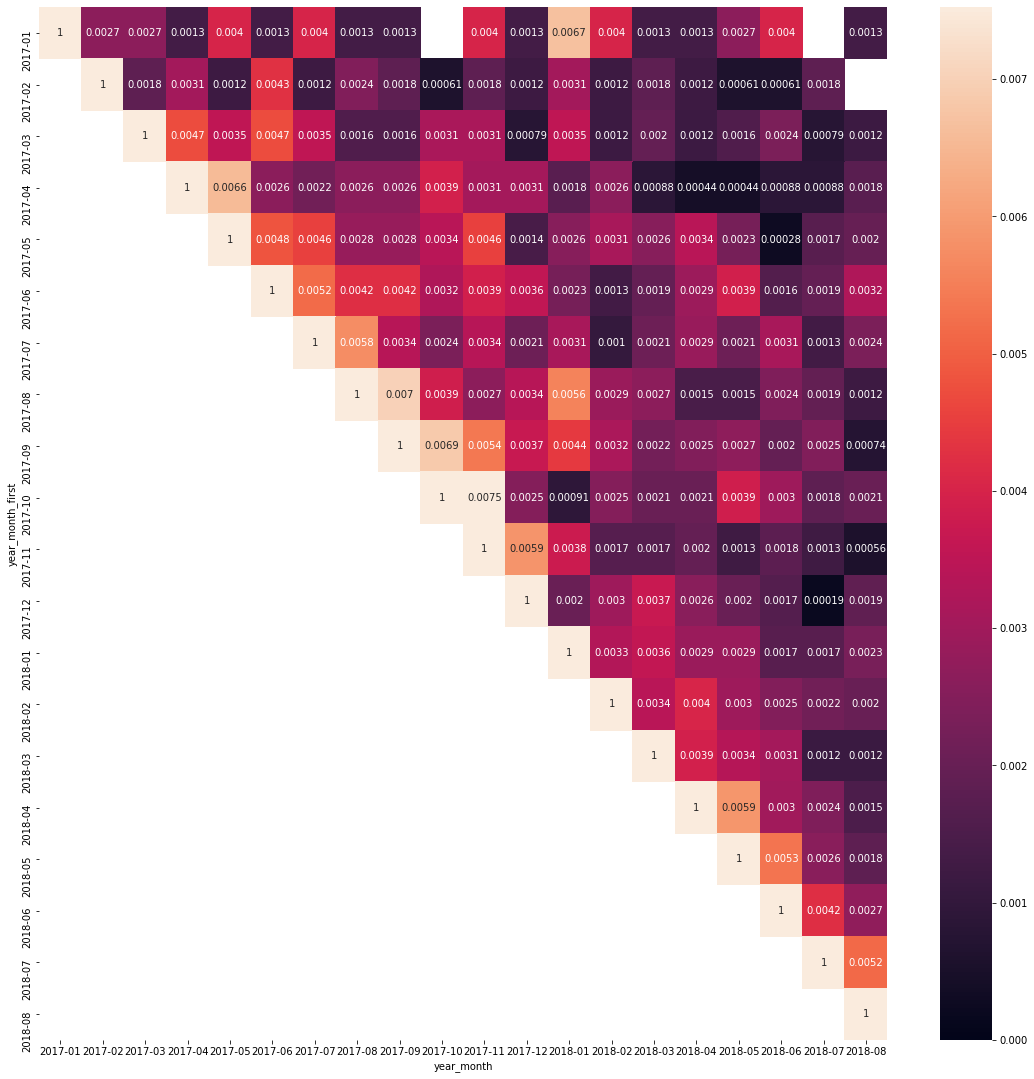

In [128]:
# строим тепловую карту
plt.figure(figsize=(19,19))
sns.heatmap(customer_retention,annot=True, vmin=0, vmax=customer_retention[customer_retention<1].max().max())

In [91]:
# находим для каждого year_month_first значение Retention для третьего месяца
value = {}
for i in range(len(customer_retention)):
    try:
        value[customer_retention.index[i].strftime('%Y-%m')] = customer_retention.iloc[i,i+2]
    except:
        value[customer_retention.index[i].strftime('%Y-%m')] = 0
retention_3 = pd.DataFrame(list(value.items()), columns = ['year_month_first', 'retention_3'])
retention_3.head()

year_month_first  retention_3
0          2017-01     0.002674
1          2017-02     0.003051
2          2017-03     0.003542
3          2017-04     0.002626
4          2017-05     0.004551

In [92]:
# находим максимальное значение Retention
retention_3[retention_3.retention_3 == retention_3.retention_3.max()]

year_month_first  retention_3
8          2017-09     0.005404

### Ответ 5: C самым высоким retention когорта пользователей купившей впервые в сентябре 2017 года

# 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

Для построения RFM-сегментации использую ранее почищенные данные, таблицу - delivered_orders ( временной период с января 2017 по август 2018) заказы совершенных покупок

In [93]:
# создаю новую таблицу order_items_new - заказы, которые входят в delivered_orders c колонками id заказа, цена товаров в заказе, уникальное id покупателя, время заказа

order_items_new = order_items[['order_id','price']].merge(delivered_orders[['order_id',
                                                      'customer_unique_id',
                                                      'order_purchase_timestamp']], on='order_id', how='left')


In [94]:
# высчитываю общую сумму заказа
order_items_new = order_items_new.groupby(['order_id','customer_unique_id','order_purchase_timestamp']).agg({'price':'sum'}).reset_index().rename(columns={'price':'total_price'})

In [95]:
# создаю колонки время от покупки пользователя до now_date
order_items_new['DaysSinceOrder'] = order_items_new['order_purchase_timestamp'].apply(lambda x: (now_date - x).days)


In [96]:
# создаю таблицу с колонками уникальное id покупателя 'customer_unique_id',
#                            время от последней покупки 'recency', 
#                            суммарное количество покупок 'frequency', 
#                            cумма покупок за все время 'monetary'

rfm = order_items_new.groupby('customer_unique_id').agg({'DaysSinceOrder':'min','order_id':'count','total_price':'sum'})\
                                             .reset_index()\
                                             .rename(columns={'DaysSinceOrder':'recency','order_id':'frequency','total_price':'monetary'})

Перед ранжированием метрик recency, frequency и monetary посмотрим как много значений в каждой из метрик

In [97]:
print(f'В метрике recency {rfm.recency.nunique()} значений')
print(f'В метрике frequency {rfm.frequency.nunique()} значений')
print(f'В метрике monetary {rfm.monetary.nunique()} значений')

В метрике recency 602 значений
В метрике frequency 9 значений
В метрике monetary 8437 значений


In [98]:
# посмотрим на уникальные значения метрики frequency
rfm.frequency.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 15])

In [99]:
# строим график распределения метрики frequency
import plotly.express as px

fig = px.histogram(rfm, x="frequency")
fig.show()

In [100]:
# смотрю распределения по количеству покупок в табличном виде
rfm['frequency'].value_counts()

1     90295
2      2561
3       180
4        28
5         9
6         5
7         3
15        1
9         1
Name: frequency, dtype: int64

Для проведения RFM-сегментации разделяют каждые значения метрик на подгруппы.
Так как в метрике **frequency** уникальных значений всего 9 и практически все значения равны 1 - разделим на 3 подгруппы. Составляю подгруппы следующим образом:

    1 - количество покупок 1 - разовые покупатели
    2 - количество покупок 2 или 3 - повторные покупатели
    3 - количество покупок 4 - постоянные покупатели
   

In [101]:
# строим график распределения метрики monetary
fig = px.histogram(rfm, x="monetary")
fig.show()

In [102]:
# посмотрим на распределение покупателей, если разделить их по сумму заказов на 5 подгрупп
rfm['monetary'].value_counts(bins=5,
                             sort=False)

(-12.59, 2688.68]      93019
(2688.68, 5376.51]        57
(5376.51, 8064.34]         6
(8064.34, 10752.17]        0
(10752.17, 13440.0]        1
Name: monetary, dtype: int64

Большинство покупателей с суммой заказа меньше 2688.68
Покупателей с суммой покупок больше 2688.68 - объединим в одну группу - крупные покупатели
Остальных еще раз поделим на 4 группы

In [103]:
rfm.query('monetary<=2688.68')['monetary'].value_counts(bins=4,sort=False)

(-1.8299999999999998, 670.638]    90916
(670.638, 1340.425]                1662
(1340.425, 2010.212]                365
(2010.212, 2680.0]                   76
Name: monetary, dtype: int64

In [104]:
# вычислим среднюю сумму у всех покупателей
rfm.query('monetary<=2688.68')['monetary'].mean()

139.08739730592677

Рассмотрев, полученные данные. Решаю для простоты восприятия поделить метрику **monetary** 

    1 - сумма покупок меньше или равно 150 рублей
    2 - сумма покупок больше 150 до 500 
    3 - сумма покупок больше 500 до 1000
    4 - сумма покупок больше 1000 до 2000
    5 - сумма покупок больше 2000 рублей

In [105]:
# строим график распределения метрики monetary
fig = px.histogram(rfm, x="recency")
fig.show()

Метрика **recency** распределна довольно равномерно. Для определения интервалов, воспользуюсь квантилями

In [106]:
quintiles = rfm['recency'].quantile([.2, .4, .6, .8]).to_dict()
quintiles


{0.2: 94.0, 0.4: 179.0, 0.6: 270.0, 0.8: 382.0}

Рассмотрев разбиение по квантилям. Решаю разбивать 
**Recency**: 

    5 - сделали последнюю покупку в течение последних 90 дней (3 месяца)
    4 - от 91 до 180 дней (больше 3, но меньше 6 месяцев)
    3 - от 181 до 270 дней (больше 6, но меньше 9 месяцев)
    2 - от 271 до 365 дней (больше 9, но меньше 12 месяцев)
    1 - больше 365 дней (больше года)
  

Теперь напишу функции, которые ранжируют метрики по подгруппам от 1 до 5. Где с улучшением метрики, увеличивается номер подгруппы.

In [107]:
def r_score(x):
    if x <= 90:
        return 5
    elif x <= 180:
        return 4
    elif x <= 270:
        return 3
    elif x <= 365:
        return 2
    else:
        return 1
    
def m_score(x):
    if x <= 150:
        return 1
    elif x <= 500:
        return 2
    elif x <= 1000:
        return 3
    elif x <= 2000:
        return 4
    else:
        return 5  
    
def f_score(x):
    if x==1:
        return 1
    if x==2 or x==3:
        return 2
    if x>=4:
        return 3

In [108]:
# проведу ранжирование
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))


In [109]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()


customer_unique_id  recency  frequency  monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      114          1    129.90  4  1  1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      117          1     18.90  4  1  1   
2  0000f46a3911fa3c0805444483337064      539          1     69.00  1  1  1   
3  0000f6ccb0745a6a4b88665a16c9f078      323          1     25.99  2  1  1   
4  0004aac84e0df4da2b147fca70cf8255      290          1    180.00  2  1  2   

  RFM Score  
0       411  
1       411  
2       111  
3       211  
4       212

Всего получается 5*5*3 = 75 сегментов RFM.

In [110]:
# узнаем есть ли постоянный покупатель (имеет более или равно 4 заказам ),
#                потративший в общем на сумму более 2000 рублей 
#                и сделавший заказ в последний три месяца 
rfm.query('F==3 and M==5 and R==5')

customer_unique_id  recency  frequency  monetary  R  F  \
72920  c8460e4251689ba205045f3ea17884a1       24          4    4080.0  5  3   

       M RFM Score  
72920  5       535

In [111]:
# узнаем сколько разовых покупателей, с общей суммой заказа меньше 150 рублей и сделавшие заказ более года назад
rfm.query('F==1 and M==1 and R==1').customer_unique_id.count()

15377

In [130]:
# посмотрим на количество покупателей, купивших более одного раза, в каждой когорте
rfm.query('F!=1')['RFM Score'].value_counts()

322    320
522    309
422    308
222    234
122    229
121    225
521    224
421    221
321    212
221    204
423     50
323     41
523     40
123     38
223     28
324     14
424     14
524     12
532      8
433      8
432      7
224      7
533      6
124      4
131      3
333      3
534      3
125      3
332      2
225      2
425      2
232      2
132      1
535      1
334      1
233      1
234      1
Name: RFM Score, dtype: int64

### Ответ 6: Проведена RFM - сегментация. Итоговая таблица *rfm*
Интервалы для метрик взяты следующие:

**Recency**: 

    5 - сделали последнюю покупку в течение последних 90 дней (3 месяца)
    4 - от 91 до 180 дней (больше 3, но меньше 6 месяцев)
    3 - от 181 до 270 дней (больше 6, но меньше 9 месяцев)
    2 - от 271 до 365 дней (больше 9, но меньше 12 месяцев)
    1 - больше 365 дней (больше года)
    
**Frequency**

    1 - количество покупок 1 - разовые покупатели
    2 - количество покупок 2 или 3 - повторные покупатели
    3 - количество покупок 4 - постоянные покупатели
    
**Monetary** 

    1 - сумма покупок меньше или равно 150 рублей
    2 - сумма покупок больше 150 до 500 
    3 - сумма покупок больше 500 до 1000
    4 - сумма покупок больше 1000 до 2000
    5 - сумма покупок больше 2000 рублей    